In [60]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
df_titanic=pd.read_csv('titanic_train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df_titanic.shape

(891, 12)

In [63]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
df_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [66]:
df_titanic.Pclass.unique()

array([3, 1, 2])

In [67]:
df_titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [68]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
df_titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


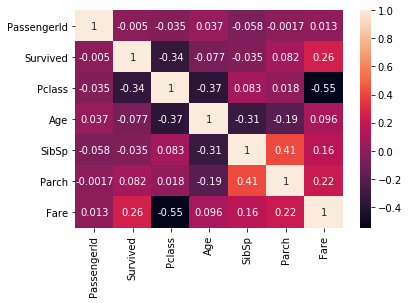

In [71]:
sns.heatmap(df_titanic.corr(), annot=True)

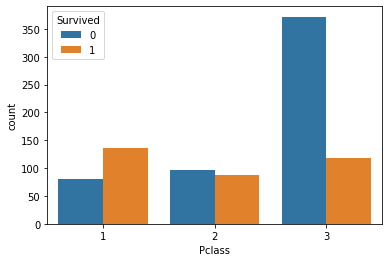

In [72]:
sns.countplot(x='Pclass',hue='Survived',data=df_titanic)
plt.show()

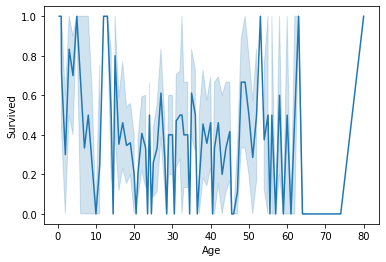

In [73]:
sns.lineplot(x='Age',y='Survived',data=df_titanic)
plt.show()

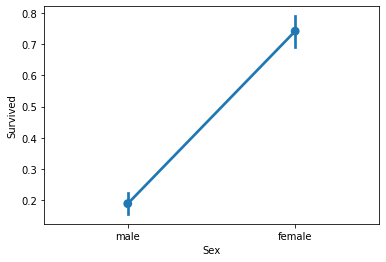

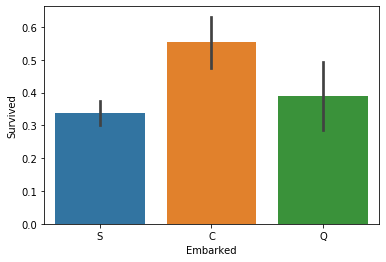

In [74]:
sns.pointplot(x='Sex',y='Survived',data=df_titanic)
plt.show()
sns.barplot(x='Embarked',y='Survived',data=df_titanic)
plt.show()

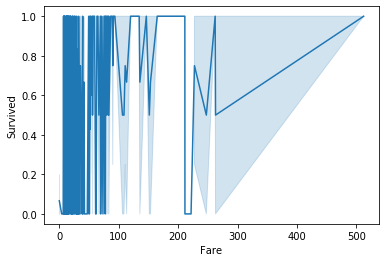

In [75]:
sns.lineplot(x='Fare',y='Survived',data=df_titanic)
plt.show()

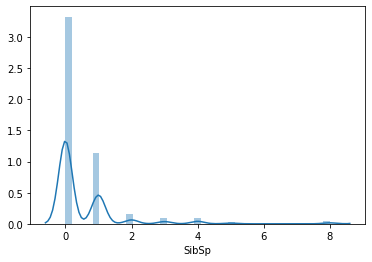

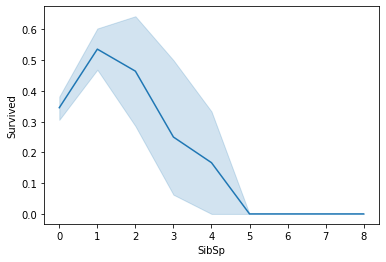

In [76]:
sns.distplot(df_titanic['SibSp'])
plt.show()
sns.lineplot(x='SibSp',y='Survived',data=df_titanic)
plt.show()

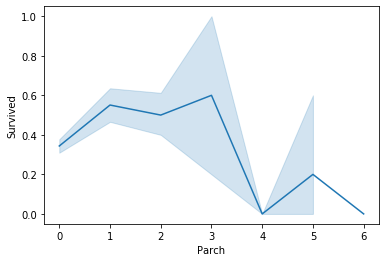

In [77]:
sns.lineplot(x='Parch',y='Survived',data=df_titanic)
plt.show()

In [78]:
#check the null values
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dataset has missing valuesin "Age", "Cabin" and "Embarked" columns

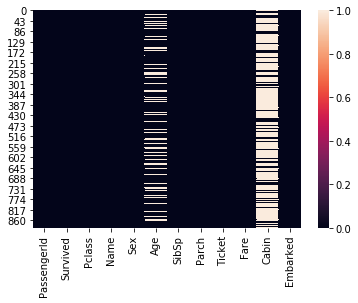

In [79]:
sns.heatmap(df_titanic.isnull())

In [80]:
#Replacing NaN values with mean and mode
df_titanic['Age']=df_titanic['Age'].replace(np.NaN,df_titanic['Age'].mean())
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode().values[0],inplace=True)

In [81]:
#Removing unwanted columns
df_titanic.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [82]:
df_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_titanic['Sex']=le.fit_transform(df_titanic['Sex'])
df_titanic['Embarked']=le.fit_transform(df_titanic['Embarked'])
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


PassengerId       AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Survived       AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Pclass         AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Sex            AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Age            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
SibSp          AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Parch          AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Fare                 AxesSubplot(0.125,0.125;0.0945122x0.343182)
Embarked          AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

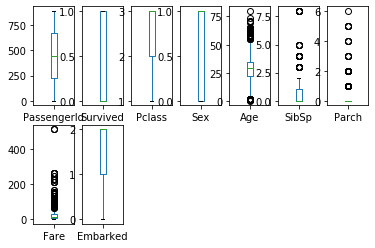

In [84]:
#Checking Outliers
df_titanic.plot(kind='box',subplots=True, layout=(2,7))

In [85]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df_titanic))
print(df_titanic.shape)
df1=df_titanic[(z<3).all(axis=1)]
print(df1.shape)

(891, 9)
(820, 9)


In [86]:
df_titanic=df1

In [87]:
#check the skewness of the data
df_titanic.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.277386
dtype: float64

In [88]:
#Treating skewness using log
for col in df_titanic.columns:
    if df_titanic.skew().loc[col] >0.55:
        df_titanic[col]=np.log1p(df_titanic[col])    

In [89]:
df_titanic.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.292829
Parch          1.832391
Fare           0.196364
Embarked      -1.277386
dtype: float64

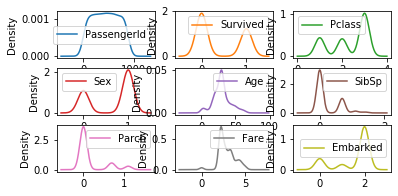

In [90]:
df_titanic.plot(kind='kde',subplots=True,layout=(4,3),sharex=False)
plt.show()

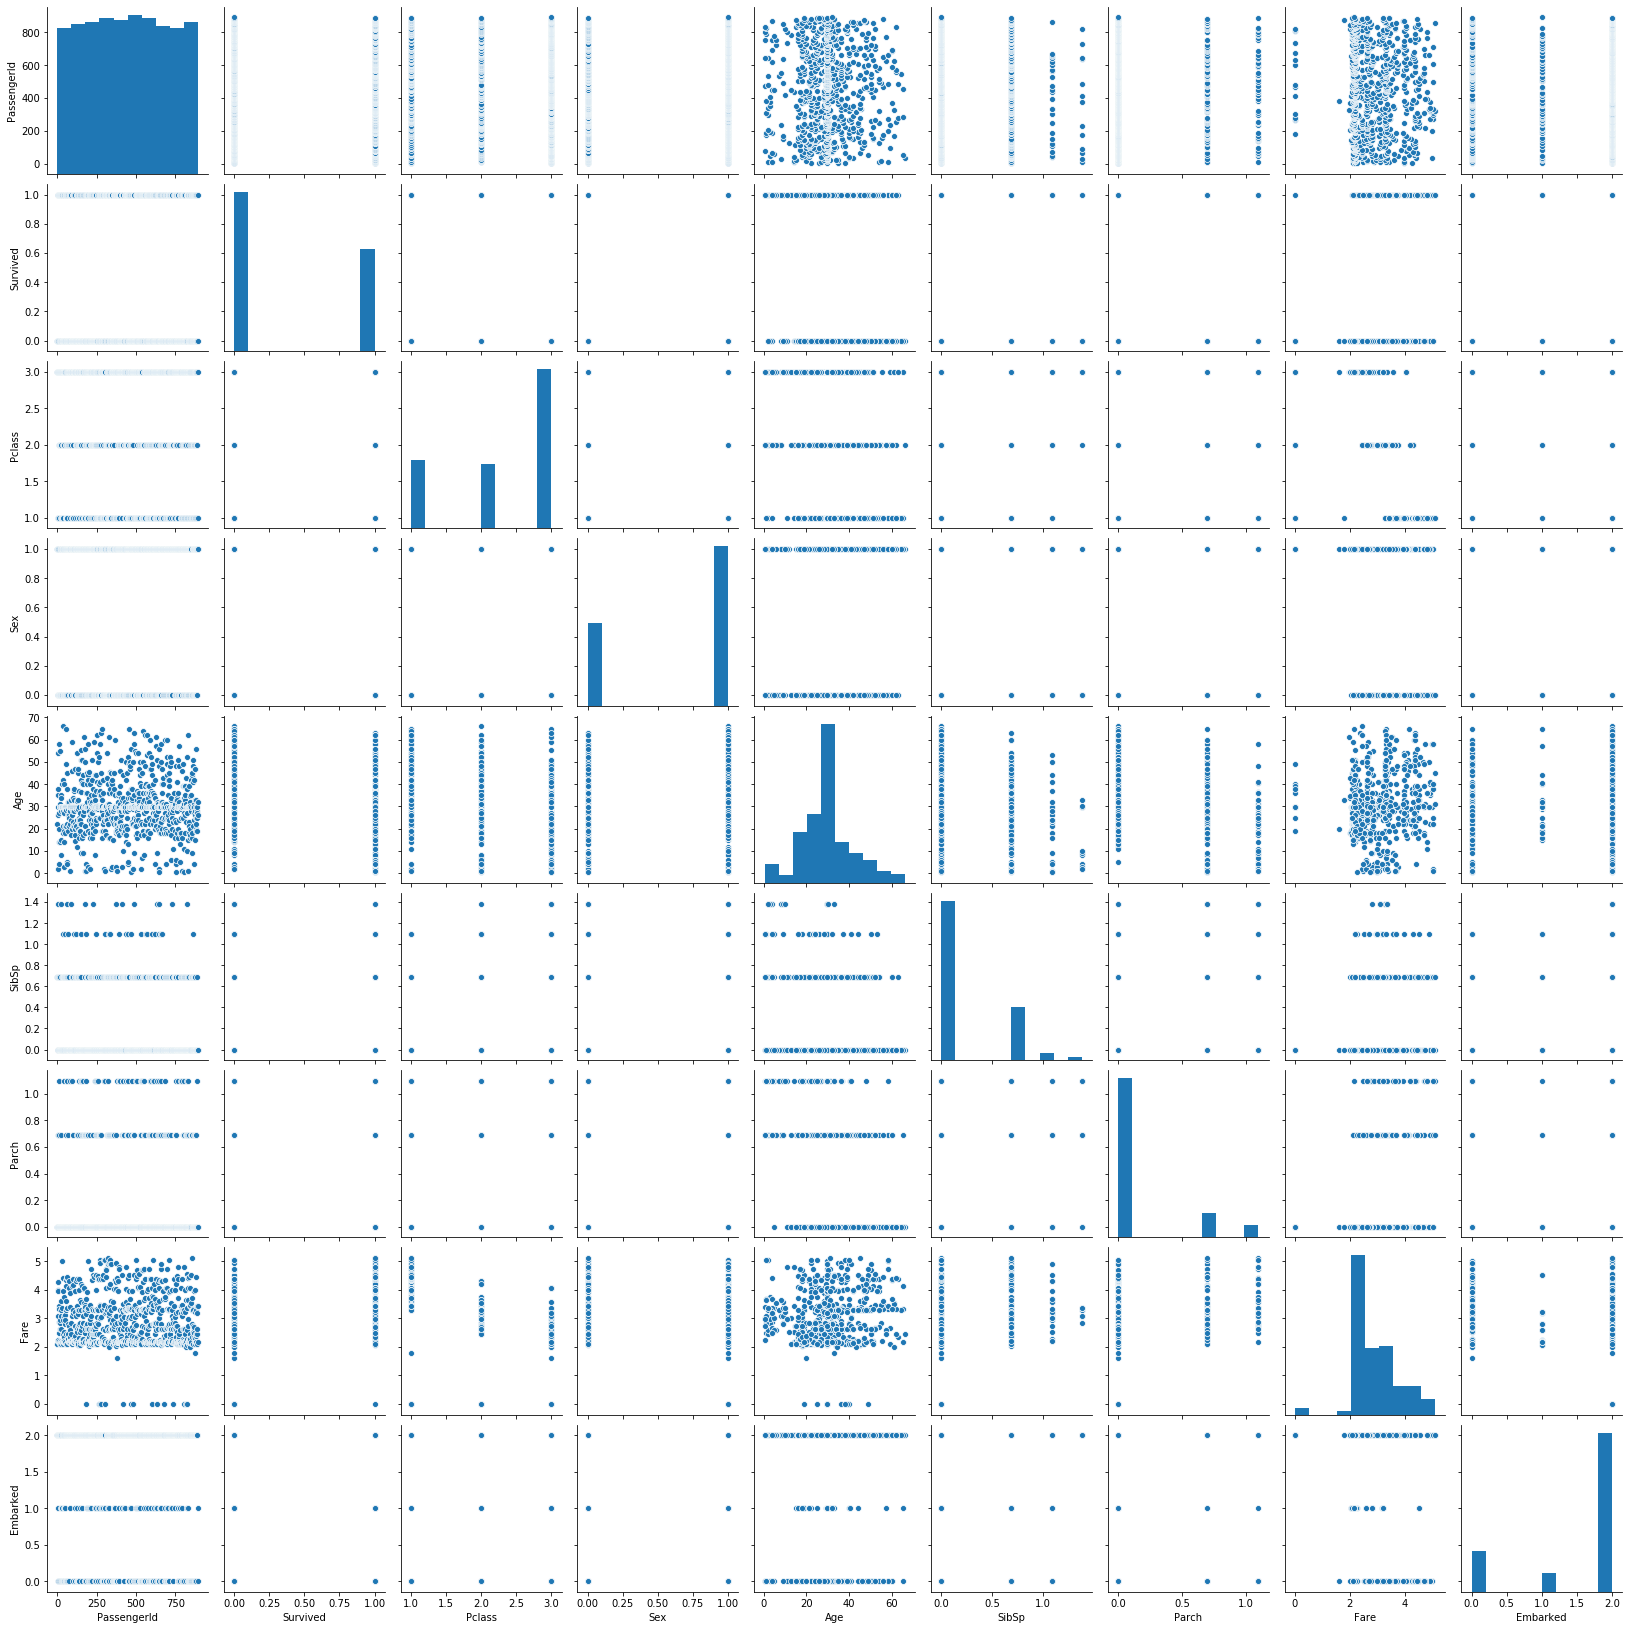

In [91]:
sns.pairplot(df_titanic)
plt.show()

In [92]:
df_x=df_titanic.drop(columns=['Survived'])
y=pd.DataFrame(df_titanic['Survived'])

In [93]:
x=df_x

In [94]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [95]:
x

array([[-1.74360547,  0.8339949 ,  0.72203588, ..., -0.46946872,
        -0.83943515,  0.58316179],
       [-1.73968479, -1.58680446, -1.38497273, ..., -0.46946872,
         1.58419878, -1.95366932],
       [-1.7357641 ,  0.8339949 , -1.38497273, ..., -0.46946872,
        -0.75161543,  0.58316179],
       ...,
       [ 1.73796351,  0.8339949 , -1.38497273, ...,  2.79333463,
         0.37375205,  0.58316179],
       [ 1.7418842 , -1.58680446,  0.72203588, ..., -0.46946872,
         0.63880539, -1.95366932],
       [ 1.74580488,  0.8339949 ,  0.72203588, ..., -0.46946872,
        -0.77372876, -0.68525377]])

In [96]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [97]:
x.shape

(820, 8)

In [98]:
y.shape

(820, 1)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
max_accuracy_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg = LogisticRegression()
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    acc_scr=accuracy_score(y_test,pred)
    print("accuracy_score corresponding to random state:",r_state, " is: ",acc_scr)
    if acc_scr>max_accuracy_score:
        max_accuracy_score=acc_scr
        final_r_state=r_state
        
print("max accuracy score corresponding to",final_r_state," is ",max_accuracy_score)     

accuracy_score corresponding to random state: 42  is:  0.823170731707317
accuracy_score corresponding to random state: 43  is:  0.8292682926829268
accuracy_score corresponding to random state: 44  is:  0.8048780487804879
accuracy_score corresponding to random state: 45  is:  0.7804878048780488
accuracy_score corresponding to random state: 46  is:  0.823170731707317
accuracy_score corresponding to random state: 47  is:  0.8048780487804879
accuracy_score corresponding to random state: 48  is:  0.8048780487804879
accuracy_score corresponding to random state: 49  is:  0.8353658536585366
accuracy_score corresponding to random state: 50  is:  0.823170731707317
accuracy_score corresponding to random state: 51  is:  0.7621951219512195
accuracy_score corresponding to random state: 52  is:  0.7804878048780488
accuracy_score corresponding to random state: 53  is:  0.7804878048780488
accuracy_score corresponding to random state: 54  is:  0.7804878048780488
accuracy_score corresponding to random st

In [100]:
#Since maximum r2 score is coming around random state 85 we will use that to create our final model
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=85,test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print("Predicted result:",pred)
print("actual result",y_test)
print("accuracy_score:",accuracy_score(y_test,pred))
print (confusion_matrix(y_test,pred))
print (classification_report(y_test,pred))

Predicted result: [0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1]
actual result      Survived
54          0
81          1
726         1
327         1
195         1
..        ...
782         0
625         0
477         0
506         1
374         0

[164 rows x 1 columns]
accuracy_score: 0.8414634146341463
[[91  9]
 [17 47]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       100
           1       0.84      0.73      0.78        64

    accuracy                           0.84       164
   macro avg       0.84      0.82      0.83       164
weighted avg       0.84      0.84      0.84       164



In [101]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), x,y,cv=5,scoring="accuracy").mean()

0.7853658536585366

In [102]:
#we use GridSearch to find the optimal value of kernel for SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd_sr = GridSearchCV(svc,grid_param)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'rbf'}


In [103]:
#optimal value of n_neighbors for KNeighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
grid_param ={'n_neighbors':range(1,30)}
gd_sr = GridSearchCV(knn,grid_param)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_neighbors': 29}


In [104]:
#optimal value of criterion for DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param ={
    'criterion': ['gini', 'entropy']
}
gd_sr = GridSearchCV(dtc,grid_param)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'entropy'}


In [105]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
grid_param={"n_estimators":[10,100,500,1000]}
gd_sr = GridSearchCV(rfc,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 100}


In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
grid_param={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
gd_sr = GridSearchCV(gb,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'learning_rate': 0.001, 'n_estimators': 1000}


In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
ab=AdaBoostClassifier()
grid_param={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lg,dtc,knn,svc,gnb]}
gd_sr = GridSearchCV(ab,grid_param,cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'base_estimator': GaussianNB(priors=None, var_smoothing=1e-09), 'learning_rate': 0.1, 'n_estimators': 500}


In [108]:
from sklearn.naive_bayes import GaussianNB
model=[GaussianNB(),SVC(kernel='rbf',C=1),KNeighborsClassifier(n_neighbors=28),DecisionTreeClassifier(criterion='gini')]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')
    

Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.8353658536585366
[[82 18]
 [ 9 55]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       100
           1       0.75      0.86      0.80        64

    accuracy                           0.84       164
   macro avg       0.83      0.84      0.83       164
weighted avg       0.84      0.84      0.84       164



Accuracy score of SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
0.8597560975609756
[[92  8]
 [15 49]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       100
           1       0.86      0.77      0.81        64

    accuracy                           0.86       164
   macro avg       0.86      0.84      0

In [109]:
print("Mean accuracy score for GaussianNB:",cross_val_score(GaussianNB(), x,y,cv=5,scoring="accuracy").mean())
print("Mean accuracy score for KNeighbors:",cross_val_score(KNeighborsClassifier(), x,y,cv=5,scoring="accuracy").mean())
print("Mean accuracy score for SVC:",cross_val_score(SVC(), x,y,cv=5,scoring="accuracy").mean())
print("Mean accuracy score for DecisionTree:",cross_val_score(DecisionTreeClassifier(), x,y,cv=5,scoring="accuracy").mean())

Mean accuracy score for GaussianNB: 0.7646341463414633
Mean accuracy score for KNeighbors: 0.7963414634146342
Mean accuracy score for SVC: 0.8158536585365853
Mean accuracy score for DecisionTree: 0.7658536585365854


In [110]:
model=[RandomForestClassifier(n_estimators=10,random_state=46),GradientBoostingClassifier(learning_rate=1,n_estimators=100),AdaBoostClassifier(base_estimator=dtc,learning_rate=1,n_estimators=1000)]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=46, verbose=0,
                       warm_start=False) is:
0.8475609756097561
[[93  7]
 [18 46]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       100
           1       0.87      0.72      0.79        64

    accuracy                           0.85       164
   macro avg       0.85      0.82      0.83       164
weighted avg       0.85      0.85      0.84       164



Accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criteri

In [111]:
print("Mean accuracy score for RandomForestClassifier:",cross_val_score(RandomForestClassifier(), x,y,cv=5,scoring="accuracy").mean())
print("Mean accuracy score for GradientForestClassifier:",cross_val_score(GradientBoostingClassifier(), x,y,cv=5,scoring="accuracy").mean())
print("Mean accuracy score for AdaBoostClassifier:",cross_val_score(AdaBoostClassifier(), x,y,cv=5,scoring="accuracy").mean())

Mean accuracy score for RandomForestClassifier: 0.8060975609756097
Mean accuracy score for GradientForestClassifier: 0.7829268292682927
Mean accuracy score for AdaBoostClassifier: 0.7219512195121951


We tried all the models and till now Support Vector Classifier is the best with the accuracy score of 85.97

In [112]:
#Save the model
from sklearn.externals import joblib
joblib.dump(svc, 'titanic_svc.pkl')

['titanic_svc.pkl']